Загрузка датасета

In [65]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [9]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
columns = [
    'status', 'duration', 'credit_history', 'purpose', 'amount',
    'savings', 'employment', 'installment_rate', 'personal_status',
    'other_debtors', 'residence', 'property', 'age', 'other_plans',
    'housing', 'num_credits', 'job', 'dependents', 'telephone', 'foreign', 'default'
]
data = pd.read_csv(url, delimiter=' ', header=None, names=columns)

In [10]:
data

,status,duration,credit_history,purpose,amount,savings,employment,installment_rate,personal_status,other_debtors,...,property,age,other_plans,housing,num_credits,job,dependents,telephone,foreign,default
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


Целевая переменная: 1 = плохой заёмщик (дефолт)

In [11]:
data['default'] = data['default'] - 1

EDA

In [12]:
data['default'].value_counts(normalize=True)

,proportion
default,
0,0.7
1,0.3


array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'amount'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'installment_rate'}>]], dtype=object)

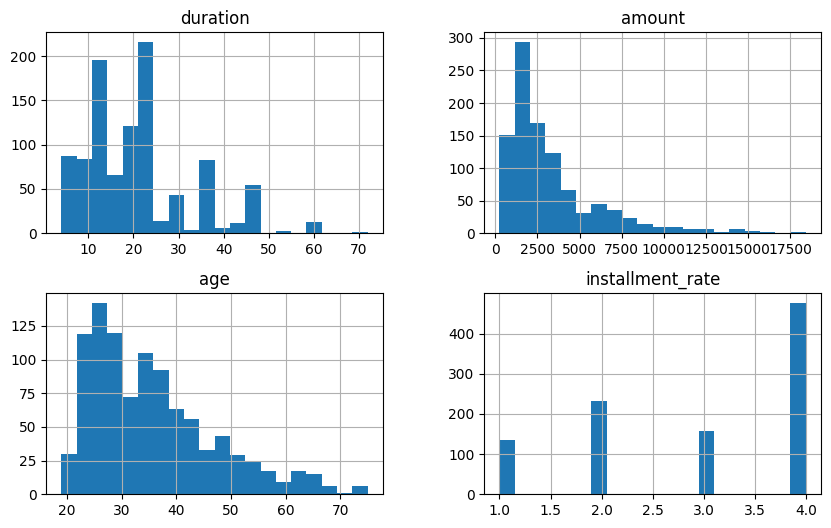

In [13]:
num_cols = ['duration', 'amount', 'age', 'installment_rate']
data[num_cols].hist(bins=20, figsize=(10, 6))

<Axes: >

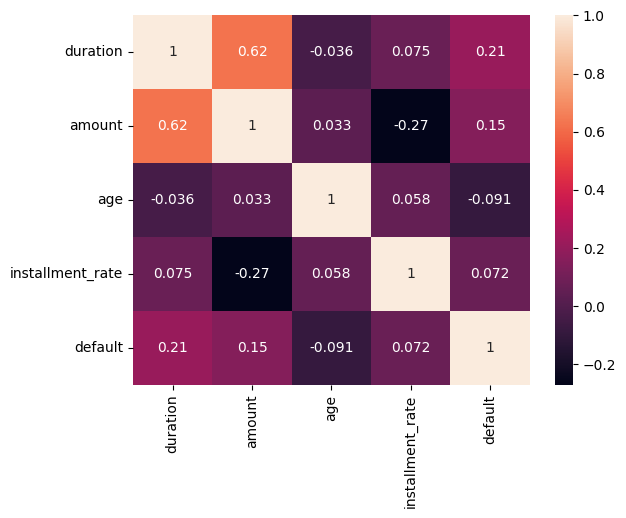

In [15]:
sns.heatmap(data[num_cols + ['default']].corr(), annot=True)

Предобработка данных

In [18]:
categ_cols = ['purpose', 'credit_history', 'savings', 'employment']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('categ', OneHotEncoder(drop='first'), categ_cols)
    ])

In [20]:
X = data.drop('default', axis=1)
y = data['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Пайплайны моделей

In [50]:
pipeline_logreg = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

pipeline_randforest = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators=200,
                                          learning_rate=0.05,
                                          max_depth=5,
                                          subsample=0.8,
                                          colsample_bytree=0.8,
                                          eval_metric='logloss',
                                          random_state=42))
])

Логистическая регрессия

In [23]:
pipeline_logreg.fit(X_train, y_train)
y_pred_logreg = pipeline_logreg.predict(X_test)

print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred_logreg):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_logreg):.2f}")

Logistic Regression:
Accuracy: 0.78
F1-score: 0.51
ROC-AUC: 0.67


Random forest

In [67]:
pipeline_randforest.fit(X_train, y_train)
y_pred_randforest = pipeline_randforest.predict(X_test)

print("Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_randforest):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred_randforest):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_randforest):.2f}")

Random Forest:
Accuracy: 0.74
F1-score: 0.45
ROC-AUC: 0.63


XGBoost

In [59]:
pipeline_xgb.fit(X_train, y_train)
y_pred_xgb = pipeline_xgb.predict(X_test)
y_pred_xgb_proba = pipeline_xgb.predict_proba(X_test)[:, 1]
# Оценка
print("\nXGBoost:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred_xgb):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_xgb_proba):.2f}")


XGBoost:
Accuracy: 0.75
F1-score: 0.43
ROC-AUC: 0.77


Важность признаков

Text(0.5, 1.0, 'Top 10 важных признаков')

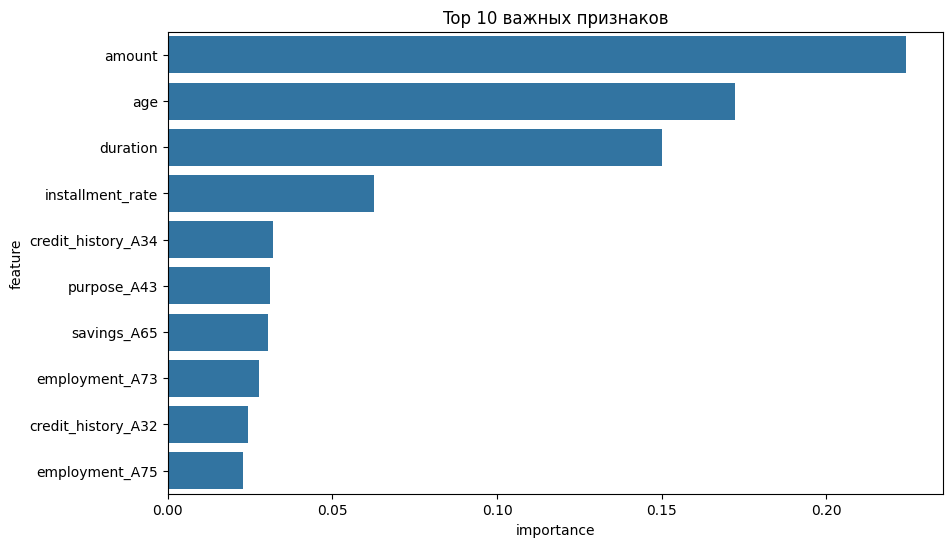

In [71]:
randforest_model = pipeline_randforest.named_steps['classifier']

preprocessor_randforest = pipeline_randforest.named_steps['preprocessor']
ohe = preprocessor_randforest.named_transformers_['categ']
categ_features = ohe.get_feature_names_out(categ_cols)
all_features = np.concatenate([num_cols, categ_features])

# 3. Создаём DataFrame с важностью
feature_importance = pd.DataFrame({
    'feature': all_features,
    'importance': randforest_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title("Top 10 важных признаков")